# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [10]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [12]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [13]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')

In [14]:
# Extract all rows of data
data_rows = soup.find_all('tr', class_ = 'data-row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [15]:
# Create an empty list
scraped_data = []
# Loop through the scraped data to create a list of rows
for row in data_rows:
    results = row.find_all('td') 
    line = []
    for result in results:
        line.append(result.text)
    scraped_data.append(line)
print(scraped_data)


    

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'], ['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0'], ['172

In [16]:
mars_temp_df = pd.DataFrame(scraped_data)
mars_temp_df.head()

,0,1,2,3,4,5,6
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [17]:
mars_temp_df = pd.DataFrame(scraped_data)
mars_temp_df.head()

,0,1,2,3,4,5,6
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [18]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_temp_df = pd.DataFrame(scraped_data, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

In [19]:
# Confirm DataFrame was created successfully
mars_temp_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [20]:
# Examine data type of each column
mars_temp_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [21]:
# Change data types for data analysis
mars_temp_df = mars_temp_df.astype({
    'id': object,
    'terrestrial_date': 'datetime64[ns]',
    'sol': int,
    'ls': int,
    'month': int,
    'min_temp': float,
    'pressure': float
})

In [22]:
# Confirm type changes were successful by examining data types again
mars_temp_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [23]:
# 1. How many months are there on Mars?
months = mars_temp_df['month'].value_counts().sort_index()
months

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64

In [24]:
# 2. How many Martian days' worth of data are there?
martian_days = mars_temp_df['sol'].nunique()
print(f"There are {martian_days} Martian days worth of data.")

There are 1867 Martian days worth of data.


In [25]:
# 3. What is the average low temperature by month?
avg_low_temp_by_month = mars_temp_df.groupby('month').min_temp.agg('mean')
avg_low_temp_by_month


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

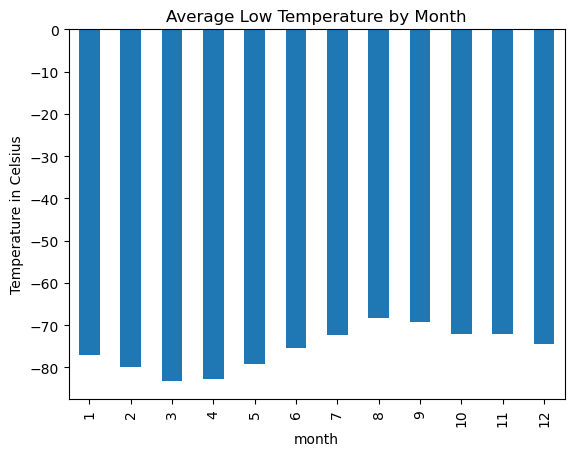

In [26]:
# plot the average temperature by month
avg_low_temp_by_month.plot.bar()
plt.title('Average Low Temperature by Month')
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')
plt.show()

In [27]:
mars_month_min_temp = avg_low_temp_by_month.sort_values()
mars_month_min_temp

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

The coldest month is Month 3 with a temperature of -83.307292
The hottest month is Month 8 with a temperature of -68.382979

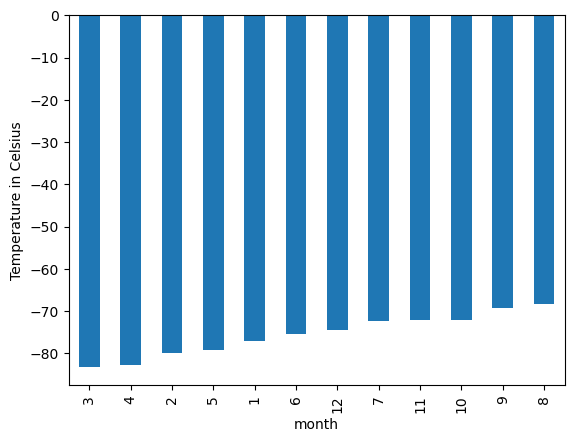

In [28]:
# Identify the coldest and hottest months in Curiosity's location

# First group data and sort by min_temp
mars_month_min_temp = avg_low_temp_by_month.sort_values()
mars_month_min_temp

# plot sorted values
mars_month_min_temp.plot.bar()
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')
plt.show()

In [29]:
# 4. Average pressure by Martian month
avg_pres_by_month = mars_temp_df.groupby('month').pressure.agg('mean')
avg_pres_by_month


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

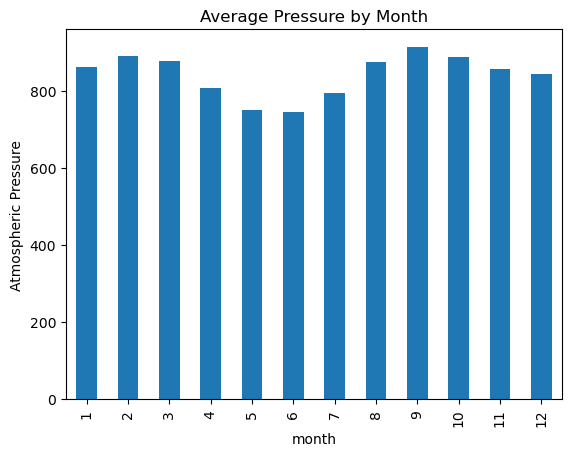

In [30]:
# Plot Average pressure by month
avg_pres_by_month.plot.bar()
plt.title('Average Pressure by Month')
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.show()

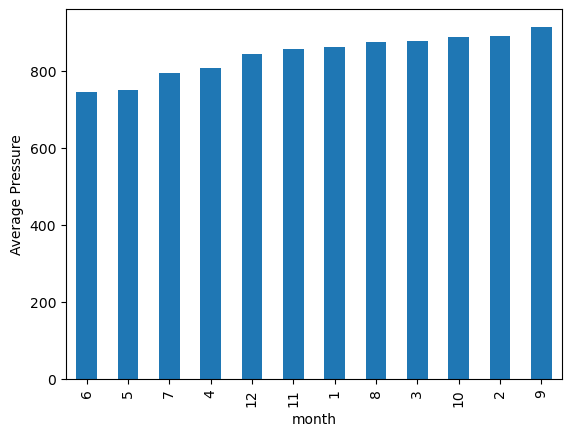

In [31]:
# Plot the ascending average pressure by month as shown in starter code.
asc_avg_pres_by_month = avg_pres_by_month.sort_values()

# plot sorted values
asc_avg_pres_by_month.plot.bar()
plt.xlabel('month')
plt.ylabel('Average Pressure')
plt.show()

In [32]:
mars_temp_df = pd.DataFrame(scraped_data, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])
mars_temp_df.head()


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


Locator attempting to generate 15001 ticks ([0.0, ..., 3000.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 15001 ticks ([0.0, ..., 3000.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 15001 ticks ([0.0, ..., 3000.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 15001 ticks ([0.0, ..., 3000.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 15001 ticks ([0.0, ..., 3000.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 15001 ticks ([0.0, ..., 3000.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 15001 ticks ([0.0, ..., 3000.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 15001 ticks ([0.0, ..., 3000.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 15001 ticks ([0.0, ..., 3000.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 15001 ticks ([0.0, ..., 3000.0]),

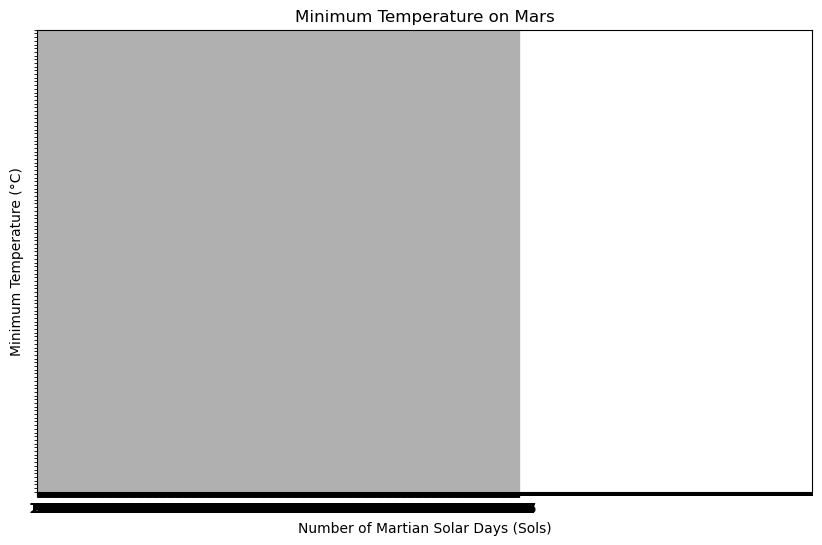

In [49]:
# Assuming 'sol' is the column containing Martian days (no need to convert dates)
plt.figure(figsize=(10, 6))  # Set the figure size to 10x6 inches
plt.plot(mars_temp_df["sol"], mars_temp_df['min_temp'], color="orange")  # Use "sol" for x-axis
plt.xlabel("Number of Martian Solar Days (Sols)")
plt.ylabel("Minimum Temperature (°C)")
plt.title("Minimum Temperature on Mars")
plt.grid(True, axis='x')
plt.xlim(0, 3000)  # Adjusts the X-axis limits
plt.ylim(-90, -65)  # Sets the Y-axis limits
plt.minorticks_on()
plt.show()

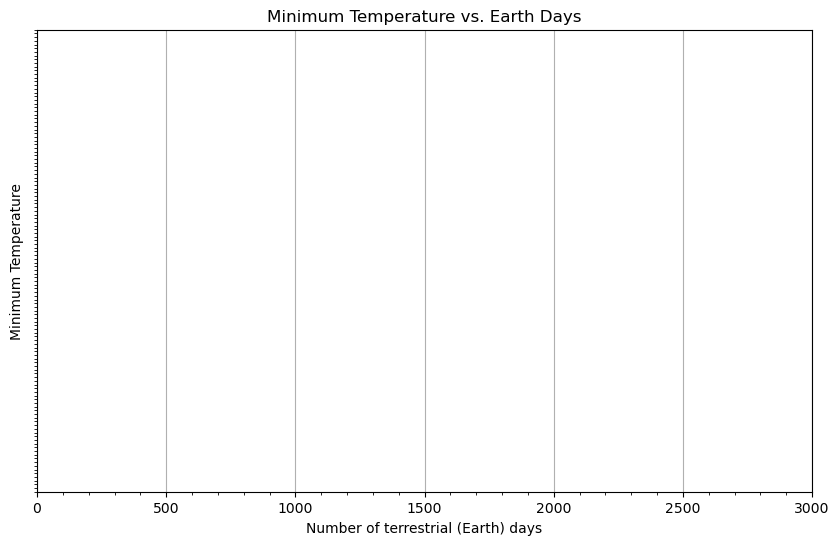

In [48]:
import matplotlib.pyplot as plt
min_tp = mars_temp_df['min_temp']
min_tp

# Assuming 'terrestrial_date' is in datetime format in your DataFrame
mars_temp_df['terrestrial_date'] = pd.to_datetime(mars_temp_df['terrestrial_date'])

# Extract the day component from the 'terrestrial_date' columnearth_days = mars_temp_df['terrestrial_date'].dt.day
earth_days = mars_temp_df['terrestrial_date'].dt.day
# Plot the minimum temperature data against Earth days with a larger figure size
plt.figure(figsize=(10, 6))  # Set the figure size to 10x6 inches
plt.plot(earth_days, mars_temp_df['min_temp'])
plt.xlabel("Number of terrestrial (Earth) days")
plt.ylabel("Minimum Temperature")
plt.title("Minimum Temperature vs. Earth Days")
plt.grid(True, axis='x')
plt.xlim(0, 3000)
plt.ylim(-90, -65)
plt.minorticks_on()
plt.show()

In [50]:
earth_days = mars_temp_df['terrestrial_date'].dt.day
earth_days


0       16
1       17
2       18
3       19
4       20
        ..
1862    23
1863    24
1864    25
1865    26
1866    27
Name: terrestrial_date, Length: 1867, dtype: int32

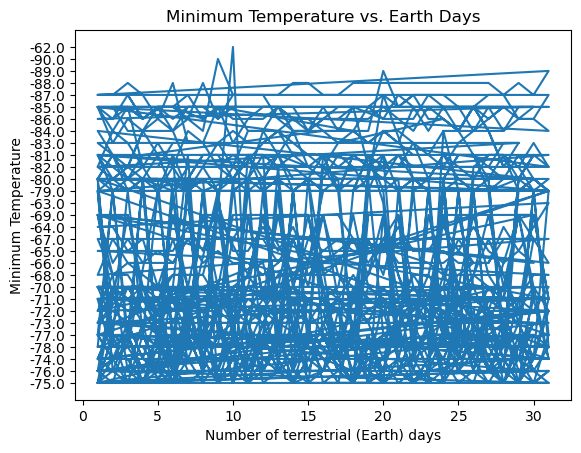

In [37]:
import matplotlib.pyplot as plt
min_tp = mars_temp_df['min_temp']
min_tp


# Extract the day component from the 'terrestrial_date' column
earth_days = mars_temp_df['terrestrial_date'].dt.day

# Plot the minimum temperature data against Earth days
plt.plot(earth_days, min_tp)
plt.xlabel("Number of terrestrial (Earth) days")
plt.ylabel("Minimum Temperature")
plt.title("Minimum Temperature vs. Earth Days")
plt.show()

In [34]:
# 5. How many terrestrial (earth) days are there in a Martian year?
min_tp = mars_temp_df['min_temp']
min_tp
terrestrial_days = mars_temp_df['terrestrial_date']

plt.plot(['terrestrial_days'].dt.days, min_tp)
plt.show()

AttributeError: 'list' object has no attribute 'dt'

In [52]:
# Sort the DataFrame by 'terrestrial_date' in ascending order
mars_temp_df_sorted = mars_temp_df.sort_values(by='terrestrial_date')
mars_temp_df_sorted.head()


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [53]:
# Assuming 'terrestrial_date' is sorted chronologically and covers at least 2 Martian years
# Assuming 'ls' column repeats every Martian year

# Find the difference in days between the first occurrences of the same 'ls' value
days_in_martian_year = (mars_temp_df_sorted['terrestrial_date'][mars_temp_df_sorted['ls'].duplicated(keep='first')]
                         .diff().dt.days.iloc[0])

print(f"Approximate Earth days in a Martian year: {days_in_martian_year}")

Approximate Earth days in a Martian year: nan


In [ ]:
# 5. How many terrestrial (earth) days are there in a Martian year?


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [ ]:
# Write the data to a CSV
mars_temp_df.to_csv("mars_weather.csv", header=True, index=False, date_format="%Y-%m-%d")

In [ ]:
browser.quit()